In [8]:
import input_image
import accuracy_history
import helper_functions

In [9]:
def translate_kanji():
    print("Make sure you have placed your image in the input_images folder\n")
    input("Confirm that you have placed your image correctly")
    print("Your image is being recognized...\n")
    image_output_list = input_image.give_image_meaning()
    print(f"\nWe recognized your image as: {image_output_list[0]}\n")
    print("It translates to:")
    for item in image_output_list[1]:
        print(item)

In [10]:
def display_accuracy():
    print("Type which character you wish to see the history of")
    options = accuracy_history.kanji_list()
    print("----------------")
    for index, option in enumerate(options, start=1):
        print(f'{index} - {option}')
    print("----------------")
    sign_to_check = input('')
    try:
        sign_to_check = int(sign_to_check)
        selected_option = list(options.values())[sign_to_check - 1]
        #print("selected_option")
        #print(selected_option)
        accuracy_history.display_specific_accuracy(selected_option)
    except:
        print("Sign not found!")

In [11]:
def show_history_options():
    accuracy_history.kanji_list()

In [12]:
def test_skills():
    print("Can you draw this kanji: ")
    print("Click on this link to see a better rendition: \n")
    
    print("Make sure you have placed your image in the input_images folder\n")
    input("Confirm that you have placed your image correctly")
    
    print("Your image is being recognized...\n")
    image_output_list = input_image.give_image_meaning()

    print(f'You drew {image_output_list[0]} with an accuracy of {image_output_list[2]}%')

In [13]:
def clear_history():
    print("Are you sure you wish to clear your history?\n")
    print("If you are, type 'yes'")
    second_choice = input('')
    if (second_choice == "yes"):
        accuracy_history.clear_history()
        print("Your history has been cleared")
    else:
        print("Your history has NOT been cleared")
        second_choice = ''

In [14]:
def accuracy_plot():
    accuracy_history.display_accuracy()

WELCOME TO KANJI RECOGNIZER :D´

What would you like to do?:
-Test your skills -> Type 1
-Get translation of a kanji symbol -> Type 2
-Show Full History -> Type 3
-Show Specific History -> Type 4
-Clear history -> Type 'clear'
(Type C to shut down)

You have chosen to see your history of a specific Kanji

Type which character you wish to see the history of
----------------
1 - 一
2 - 丁
3 - 丂
4 - 七
5 - 丄
6 - 丅
7 - 丆
8 - 万
----------------


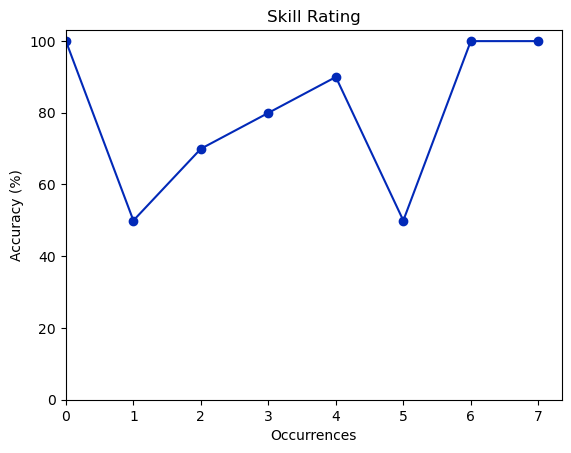

WELCOME TO KANJI RECOGNIZER :D´

What would you like to do?:
-Test your skills -> Type 1
-Get translation of a kanji symbol -> Type 2
-Show Full History -> Type 3
-Show Specific History -> Type 4
-Clear history -> Type 'clear'
(Type C to shut down)

MAKE A CORRECT CHOICE
WELCOME TO KANJI RECOGNIZER :D´

What would you like to do?:
-Test your skills -> Type 1
-Get translation of a kanji symbol -> Type 2
-Show Full History -> Type 3
-Show Specific History -> Type 4
-Clear history -> Type 'clear'
(Type C to shut down)

Accuracy history: 


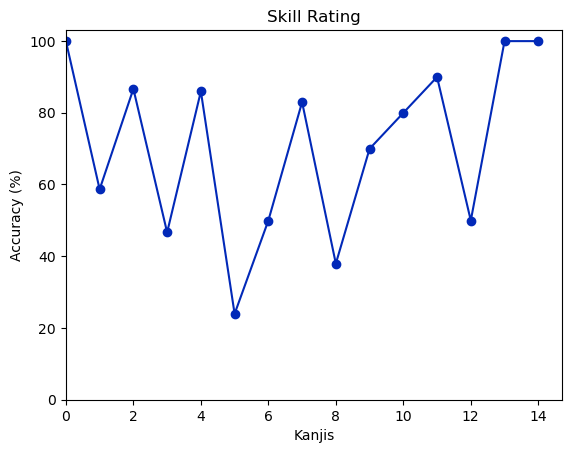

WELCOME TO KANJI RECOGNIZER :D´

What would you like to do?:
-Test your skills -> Type 1
-Get translation of a kanji symbol -> Type 2
-Show Full History -> Type 3
-Show Specific History -> Type 4
-Clear history -> Type 'clear'
(Type C to shut down)

You have chosen to clear your history
Are you sure you wish to clear your history?

If you are, type 'yes'
History in 'accuracy_history.csv' has been cleared.
Your history has been cleared
WELCOME TO KANJI RECOGNIZER :D´

What would you like to do?:
-Test your skills -> Type 1
-Get translation of a kanji symbol -> Type 2
-Show Full History -> Type 3
-Show Specific History -> Type 4
-Clear history -> Type 'clear'
(Type C to shut down)

Your history has been saved to accuracy_history.csv.
SHUT DOWN


In [15]:

no_shutdown = True
accuracy_history.load_history()
while no_shutdown:

    print("WELCOME TO KANJI RECOGNIZER :D´\n")
    print("What would you like to do?:\n-Test your skills -> Type 1\n-Get translation of a kanji symbol -> Type 2\n-Show Full History -> Type 3\n-Show Specific History -> Type 4\n-Clear history -> Type 'clear'\n(Type C to shut down)\n")
    choice = input("Type your choice here!")

    if (choice == "1"):
        print("You have chosen to test your skills\n")    
        test_skills()
        
    elif (choice == "2"):
        print("You have chosen to translate a kanji symbol\n")
        translate_kanji()

    elif (choice == "3"):
        print("Accuracy history: ")
        accuracy_plot()

    elif (choice == "4"):
        print("You have chosen to see your history of a specific Kanji\n")
        display_accuracy()

    elif (choice.lower() == "clear"):
        print("You have chosen to clear your history")
        clear_history()
        
    elif (choice in ["c", "C"]):
        
        accuracy_history.save_history()
        no_shutdown = False
        
    else:
        print("MAKE A CORRECT CHOICE")

print("SHUT DOWN")
